In [2]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [3]:
# torch.manual_seed(1)    # reproducible

LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

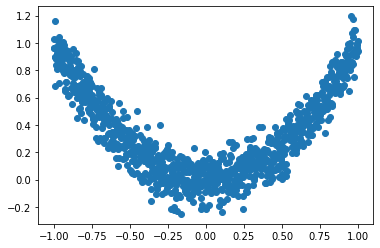

In [4]:
# fake data
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))

# plot dataset
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [7]:
# data loader
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(dataset=torch_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

# default network
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 10)
        self.predict = torch.nn.Linear(10, 1)
        
    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [30]:
# different dets
net_SGD = Net()
net_Momentum = Net()
net_RMSporp = Net()
net_Adam = Net()
nets = [net_SGD, net_Momentum, net_RMSporp, net_Adam]

# different optimizers
opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSporp = torch.optim.RMSprop(net_RMSporp.parameters(), lr=LR, alpha=0.9)
opt_Adam = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSporp, opt_Adam]

loss_func = torch.nn.MSELoss()
losses_his = [[], [], [], []]  # record loss

In [31]:
# training
for epoch in range(EPOCH):
    print('Epoch: ', epoch)
    for step, (b_x, b_y) in enumerate(loader):  # for each training step
        for net, opt, l_his in zip(nets, optimizers, losses_his):
            output = net(b_x)                   # output for the net
            loss = loss_func(output, b_y)       # compute loss for every net
            opt.zero_grad()                     # clear gradients for next train
            loss.backward()                     # backpropagation, compute gradients
            opt.step()                          # apply gradients
            l_his.append(loss.data.numpy())     # loss recoder

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11


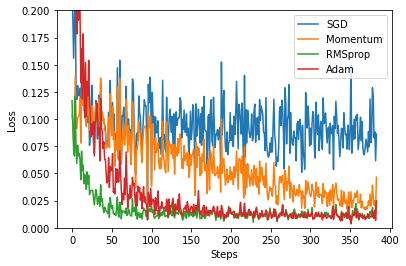

In [32]:
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()